In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Load data (replace with your actual CSV path)
df = pd.read_csv(r"C:\Users\Vinay Kasana\Downloads\NIFTY 50_Historical_PR_01042010to01042025.csv")


# Check the first few rows and columns
print(df.head())
print("Available columns:", df.columns)

# Example preprocessing (you’ll need to adjust based on your dataset)
df.dropna(inplace=True)

# Ensure 'Close' and 'Open' are numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')

# Create label: Up (1) or Down (0)
df['Label'] = (df['Close'] > df['Open']).astype(int)

# Define features based on available columns
# Check which features are available in the DataFrame
available_features = df.columns.tolist()
print("Available features:", available_features)

# Adjust the features list based on available columns
# Remove 'Volume' if it's not available
features = ['Open', 'High', 'Low']  # Adjust this list based on your dataset
if 'Volume' in available_features:
       features.append('Volume')

# Check if all features are available in the DataFrame
for feature in features:
    if feature not in available_features:
       print(f"Warning: '{feature}' is not in the DataFrame columns.")

# Define X and y
X = df[features]
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

  Index Name         Date      Open      High      Low     Close
0   NIFTY 50  01 Apr 2025  23341.10  23565.15  23136.4  23165.70
1   NIFTY 50  28 Mar 2025  23600.40  23649.20  23450.2  23519.35
2   NIFTY 50  27 Mar 2025  23433.95  23646.45  23412.2  23591.95
3   NIFTY 50  26 Mar 2025  23700.95  23736.50  23451.7  23486.85
4   NIFTY 50  25 Mar 2025  23751.50  23869.60  23601.4  23668.65
Available columns: Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
Available features: ['Index Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Label']
Accuracy: 0.7302
Confusion Matrix:
[[296  88]
 [113 248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       384
           1       0.74      0.69      0.71       361

    accuracy                           0.73       745
   macro avg       0.73      0.73      0.73       745
weighted avg       0.73      0.73      0.73       745



C:\Users\Vinay Kasana\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning:

[10:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Load the data
df = pd.read_csv(r"C:\Users\Vinay Kasana\Downloads\NIFTY 50_Historical_PR_01042010to01042025.csv")

# Preprocessing
df.dropna(inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')

# ----- Add Technical Indicators -----

# Simple Moving Average (SMA)
df['SMA_10'] = df['Close'].rolling(window=10).mean()

# Exponential Moving Average (EMA)
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# Relative Strength Index (RSI)
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26

# Fill or Drop NaN values generated by indicators
df.dropna(inplace=True)

# ----- Define Label -----
df['Label'] = (df['Close'] > df['Open']).astype(int)

# ----- Define Features -----
features = ['Open', 'High', 'Low', 'Close', 'SMA_10', 'EMA_10', 'RSI', 'MACD']
X = df[features]
y = df['Label']

# ----- Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# ----- Train Model -----
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# ----- Predictions -----
y_pred = model.predict(X_test)

# ----- Accuracy and Evaluation -----
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Save the new dataset with indicators
df.to_csv(r"C:\Users\Vinay Kasana\Downloads\NIFTY50_with_indicators.csv", index=False)


C:\Users\Vinay Kasana\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning:

[10:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.7564
Confusion Matrix:
[[319  81]
 [100 243]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       400
           1       0.75      0.71      0.73       343

    accuracy                           0.76       743
   macro avg       0.76      0.75      0.75       743
weighted avg       0.76      0.76      0.76       743



In [26]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import warnings
warnings.filterwarnings('ignore')

# Load the data
file_path = r"C:\Users\Vinay Kasana\Downloads\NIFTY 50_Historical_PR_01042015to26042025.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError("CSV file not found. Ensure the file path is correct.")

# Preprocessing
required_columns = ['Date', 'Open', 'High', 'Low', 'Close']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"DataFrame must contain columns: {required_columns}")

df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric, errors='coerce')
if 'Volume' not in df.columns:
    df['Volume'] = 0
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Technical Indicators
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

df.dropna(inplace=True)

# Save processed data
df.to_csv(r"C:\Users\Vinay Kasana\Downloads\NIFTY50_with_indicators_xgboost.csv")

# Define features and target
all_features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'SMA_20', 'EMA_20', 'RSI', 'MACD']
X = df[all_features]
y = df['Close']

# Train XGBoost model with tuning
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
xgb_model_tuner = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_cv = GridSearchCV(xgb_model_tuner, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cv.fit(X, y)
best_xgb_model = grid_cv.best_estimator_

# Save model
best_xgb_model.save_model(r"C:\Users\Vinay Kasana\Downloads\xgboost_nifty_model.json")

# Initialize Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("NIFTY 50 XGBoost Dynamic Dashboard", style={'textAlign': 'center'}),
    html.Label("Select Date Range:"),
    dcc.DatePickerRange(
        id='date-picker',
        min_date_allowed=df.index.min(),
        max_date_allowed=df.index.max(),
        start_date=df.index.min(),
        end_date=df.index.max()
    ),
    html.Label("Select Features:", style={'marginTop': '20px'}),
    dcc.Dropdown(
        id='feature-selector',
        options=[{'label': f, 'value': f} for f in all_features],
        value=['Open', 'High', 'Low', 'SMA_20', 'RSI'],
        multi=True
    ),
    dcc.Graph(id='actual-vs-predicted'),
    dcc.Graph(id='residual-scatter'),
    dcc.Graph(id='feature-importance'),
    dcc.Graph(id='correlation-heatmap'),
    html.Div(id='metrics', style={'marginTop': '20px'})
])

# Callback to update graphs
@app.callback(
    [Output('actual-vs-predicted', 'figure'),
     Output('residual-scatter', 'figure'),
     Output('feature-importance', 'figure'),
     Output('correlation-heatmap', 'figure'),
     Output('metrics', 'children')],
    [Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date'),
     Input('feature-selector', 'value')]
)
def update_graphs(start_date, end_date, selected_features):
    # Filter data by date range
    filtered_df = df.loc[start_date:end_date].copy()
    if filtered_df.empty or not selected_features:
        return [go.Figure()] * 4 + ["No data or features selected."]

    # Prepare features and target
    X_filtered = filtered_df[selected_features]
    y_filtered = filtered_df['Close']
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

    # Train model
    model = xgb.XGBRegressor(objective='reg:squarederror', **grid_cv.best_params_)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Prepare test DataFrame
    test_df = X_test.copy()
    test_df['Close'] = y_test
    test_df['Predicted'] = preds
    test_df['Residual'] = test_df['Close'] - test_df['Predicted']
    test_df.sort_index(inplace=True)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    mape = np.mean(np.abs((y_test - preds) / y_test)) * 100
    metrics_text = f"RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%"

    # Plot 1: Actual vs Predicted
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=test_df.index, y=test_df['Close'], mode='lines', name='Actual', line=dict(color='blue')))
    fig1.add_trace(go.Scatter(x=test_df.index, y=test_df['Predicted'], mode='lines', name='Predicted', line=dict(color='orange', dash='dash')))
    fig1.update_layout(
        title="Actual vs Predicted Closing Prices",
        xaxis_title="Date",
        yaxis_title="Close Price (INR)",
        template="plotly_white",
        height=400,
        xaxis=dict(tickformat="%b %Y", rangeslider_visible=True)
    )

    # Plot 2: Residual Scatter
    fig2 = px.scatter(test_df, x='Close', y='Residual', title="Residual vs Actual Close Prices", template="plotly_white", height=400)
    fig2.update_traces(marker=dict(size=8, opacity=0.6, color='purple'))
    fig2.add_hline(y=0, line_dash="dash", line_color="red")
    fig2.update_layout(showlegend=False, xaxis_title="Actual Close Price", yaxis_title="Residual")

    # Plot 3: Feature Importance
    feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=True)
    fig3 = px.bar(feature_importance, x='Importance', y='Feature', title="Feature Importance", template="plotly_white", height=400)
    fig3.update_layout(showlegend=False, xaxis_title="Importance", yaxis_title="Feature")

    # Plot 4: Correlation Heatmap
    corr_matrix = filtered_df[selected_features + ['Close']].corr()
    fig4 = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='RdBu',
        zmin=-1, zmax=1,
        text=corr_matrix.values.round(2),
        texttemplate="%{text}",
        textfont={"size": 10}
    ))
    fig4.update_layout(
        title="Feature Correlation Heatmap",
        xaxis_title="Features",
        yaxis_title="Features",
        template="plotly_white",
        height=400
    )

    return fig1, fig2, fig3, fig4, metrics_text

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

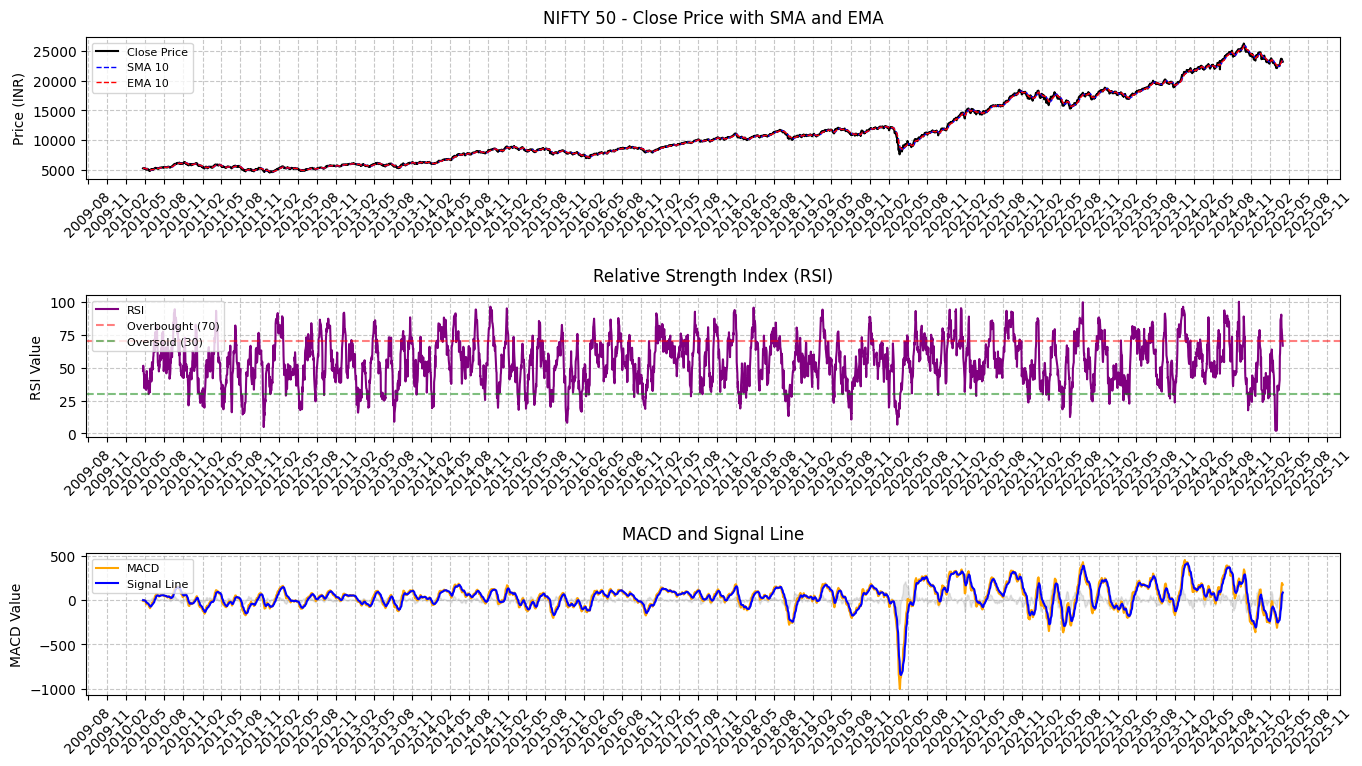

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Load the NIFTY 50 data
try:
    df = pd.read_csv(r"C:\Users\Vinay Kasana\Downloads\NIFTY 50_Historical_PR_01042010to01042025.csv")
except FileNotFoundError:
    raise FileNotFoundError("CSV file not found. Ensure the file path is correct (e.g., r'C:\\Users\\Vinay Kasana\\Downloads\\NIFTY 50_Historical_PR_01042023to01042025.csv').")

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
df.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

# Ensure numeric columns
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
if 'Volume' in df.columns:
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
else:
    df['Volume'] = 0  # Add Volume as 0 if not present

# Technical Indicators
# Simple Moving Average (SMA) and Exponential Moving Average (EMA)
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# Relative Strength Index (RSI)
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Drop rows with NaN values from indicators
df.dropna(inplace=True)

# Save DataFrame with indicators
df.to_csv(r"C:\Users\Vinay Kasana\Downloads\NIFTY50_with_indicators.csv")

# Plotting the indicators
plt.figure(figsize=(14, 10))

# Plot 1: Price with SMA and EMA
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1.5)
plt.plot(df.index, df['SMA_10'], label='SMA 10', color='blue', linestyle='--', linewidth=1)
plt.plot(df.index, df['EMA_10'], label='EMA 10', color='red', linestyle='--', linewidth=1)
plt.title('NIFTY 50 - Close Price with SMA and EMA', fontsize=12, pad=10)
plt.ylabel('Price (INR)', fontsize=10)
plt.legend(loc='upper left', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Plot 2: RSI
plt.subplot(4, 1, 2)
plt.plot(df.index, df['RSI'], label='RSI', color='purple', linewidth=1.5)
plt.axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
plt.title('Relative Strength Index (RSI)', fontsize=12, pad=10)
plt.ylabel('RSI Value', fontsize=10)
plt.legend(loc='upper left', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Plot 3: MACD
plt.subplot(4, 1, 3)
plt.plot(df.index, df['MACD'], label='MACD', color='orange', linewidth=1.5)
plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='blue', linewidth=1.5)
plt.fill_between(df.index, df['MACD'] - df['Signal_Line'], color='gray', alpha=0.2)
plt.title('MACD and Signal Line', fontsize=12, pad=10)
plt.ylabel('MACD Value', fontsize=10)
plt.legend(loc='upper left', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)


# Layout and save
plt.tight_layout(pad=2.0)
plt.savefig(r"C:\Users\Vinay Kasana\Downloads\NIFTY50_indicators_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data
df = pd.read_csv(r"C:\Users\Vinay Kasana\Downloads\NIFTY 50_Historical_PR_01042010to01042025.csv")

# Preprocess
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate Technical Indicators
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# Check if 'Volume' column exists
has_volume = 'Volume' in df.columns

# Create subplots (2 rows if volume exists, 1 row otherwise)
if has_volume:
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        vertical_spacing=0.02,
                        row_heights=[0.7, 0.3],
                        specs=[[{"type": "xy"}],
                               [{"type": "xy"}]])
else:
    fig = make_subplots(rows=1, cols=1,
                        vertical_spacing=0.02,
                        specs=[[{"type": "xy"}]])

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name="Candlestick",
    increasing_line_color='lime',
    decreasing_line_color='red',
), row=1, col=1)

# Add SMA line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['SMA_20'],
    mode='lines',
    line=dict(color='blue', width=1.5),
    name="SMA 20"), row=1, col=1)

# Add EMA line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['EMA_20'],
    mode='lines',
    line=dict(color='orange', width=1.5, dash='dash'),
    name="EMA 20"), row=1, col=1)

# Add Volume bar chart if available
if has_volume:
    fig.add_trace(go.Bar(
        x=df.index,
        y=df['Volume'],
        name="Volume",
        marker_color='lightblue',
        opacity=0.5
    ), row=2, col=1)

# Layout Settings
fig.update_layout(
    title="NIFTY 50 | Interactive Candlestick Chart with SMA & EMA",
    xaxis_rangeslider_visible=False,
    hovermode='x unified',
    template="plotly_dark",
    height=800 if not has_volume else 900,
    showlegend=True,
    legend=dict(orientation="h", y=1.02, yanchor="bottom"),
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()


In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
df = pd.read_csv(r"C:\Users\Vinay Kasana\Downloads\NIFTY 50_Historical_PR_01042015to26042025.csv")

# Preprocessing
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate Technical Indicators
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# RSI Calculation
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df['Close'])

# Identify Buy/Sell based on RSI levels
df['Buy_Signal'] = np.where((df['RSI'] < 30), df['Close'], np.nan)
df['Sell_Signal'] = np.where((df['RSI'] > 70), df['Close'], np.nan)

# Create subplots: Candlestick, Volume, and RSI
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.02,
    row_heights=[0.6, 0.2, 0.2],
    specs=[[{"type": "xy"}],
           [{"type": "xy"}],
           [{"type": "xy"}]]
)

# Row 1: Candlestick
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name="Candlesticks",
    increasing_line_color='lime',
    decreasing_line_color='red'
), row=1, col=1)

# SMA and EMA on Candlestick
fig.add_trace(go.Scatter(
    x=df.index, y=df['SMA_20'],
    line=dict(color='blue', width=1.5),
    name="SMA 20"
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=df.index, y=df['EMA_20'],
    line=dict(color='orange', width=1.5, dash='dash'),
    name="EMA 20"
), row=1, col=1)

# Buy/Sell signals
fig.add_trace(go.Scatter(
    x=df.index, y=df['Buy_Signal'],
    mode='markers',
    marker=dict(symbol='triangle-up', color='green', size=10),
    name='Buy Signal'
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=df.index, y=df['Sell_Signal'],
    mode='markers',
    marker=dict(symbol='triangle-down', color='red', size=10),
    name='Sell Signal'
), row=1, col=1)

# Row 2: Volume (only if available)
if 'Volume' in df.columns:
    fig.add_trace(go.Bar(
        x=df.index, y=df['Volume'],
        marker_color='lightblue',
        name="Volume",
        opacity=0.5
    ), row=2, col=1)

# Row 3: RSI
fig.add_trace(go.Scatter(
    x=df.index, y=df['RSI'],
    line=dict(color='purple', width=2),
    name="RSI"
), row=3, col=1)

# RSI thresholds
fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

# Layout
fig.update_layout(
    title="NIFTY 50 Deep Interactive Dashboard (Candlestick + SMA/EMA + RSI)",
    xaxis_rangeslider_visible=False,
    hovermode="x unified",
    template="plotly_dark",
    height=1000,
    showlegend=True,
    legend=dict(orientation="h", y=1.05),
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()
